In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("data/suicide_rates.csv")
file2 = pd.read_csv("data/population/pop_totals.csv")

# preview file data using .head()
file.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
file2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [3]:
countries = file['country'].unique()
#countries[100]


In [4]:
len(countries)

101

In [5]:
np.sort(file['year'].unique())

x_years = np.linspace(2006,2015,10)
x_years

array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015.])

In [6]:
file['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [7]:
file['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [8]:
max_suicide = file.groupby('suicides/100k pop').aggregate(np.max)
max_suicide

,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
suicides/100k pop,,,,,,,,,,,
0.00,Uruguay,2016,male,75+ years,0,8673303,Uruguay2014,0.942,"997,007,926",126352,Silent
0.02,Thailand,2011,male,5-14 years,1,5821000,Thailand1994,0.651,"416,878,162,441",8906,Millenials
0.03,United Kingdom,2010,male,5-14 years,1,3778962,United Kingdom2010,0.906,"926,884,816,754",42486,Millenials
0.04,Spain,2015,male,5-14 years,2,5126281,Spain2015,0.874,"612,939,685,081",36869,Millenials
0.05,United Kingdom,2011,male,5-14 years,2,3949849,United Kingdom2003,0.870,"906,853,273,138",36289,Millenials
...,...,...,...,...,...,...,...,...,...,...,...
182.32,Republic of Korea,2010,male,75+ years,1152,631853,Republic of Korea2010,NaN,"1,094,499,338,703",22994,Silent
185.37,Republic of Korea,2011,male,75+ years,1276,688365,Republic of Korea2011,NaN,"1,202,463,682,634",25157,Silent
187.06,Suriname,2012,male,75+ years,10,5346,Suriname2012,0.711,"4,980,000,000",10227,Silent


In [9]:
suicide_rates = file.drop(labels = 'gdp_per_capita ($)', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'country-year', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'HDI for year', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'age', axis =1)

In [10]:
suicide_rates

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,male,21,312900,6.71,"2,156,624,900",Generation X
1,Albania,1987,male,16,308000,5.19,"2,156,624,900",Silent
2,Albania,1987,female,14,289700,4.83,"2,156,624,900",Generation X
3,Albania,1987,male,1,21800,4.59,"2,156,624,900",G.I. Generation
4,Albania,1987,male,9,274300,3.28,"2,156,624,900",Boomers
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,107,3620833,2.96,"63,067,077,179",Generation X
27816,Uzbekistan,2014,female,9,348465,2.58,"63,067,077,179",Silent
27817,Uzbekistan,2014,male,60,2762158,2.17,"63,067,077,179",Generation Z
27818,Uzbekistan,2014,female,44,2631600,1.67,"63,067,077,179",Generation Z


In [11]:
#suicide_10= suicide_rates[suicide_rates['year'] >= 2006] and suicide_rates[suicide_rates['year'] <=2016]
suicide_10=suicide_rates[(suicide_rates['year'] >= 2006) & (suicide_rates['year'] <= 2015)]
suicide_10

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
204,Albania,2006,female,0,283138,0.00,"8,992,642,349",Millenials
205,Albania,2006,female,0,186391,0.00,"8,992,642,349",Generation X
206,Albania,2006,female,0,388746,0.00,"8,992,642,349",Boomers
207,Albania,2006,female,0,267316,0.00,"8,992,642,349",Millenials
208,Albania,2006,female,0,215907,0.00,"8,992,642,349",Silent
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,107,3620833,2.96,"63,067,077,179",Generation X
27816,Uzbekistan,2014,female,9,348465,2.58,"63,067,077,179",Silent
27817,Uzbekistan,2014,male,60,2762158,2.17,"63,067,077,179",Generation Z
27818,Uzbekistan,2014,female,44,2631600,1.67,"63,067,077,179",Generation Z


In [12]:
global_suicide_10 = suicide_10.groupby("year").sum()
global_suicide_10

,suicides_no,population,suicides/100k pop
year,,,
2006,233361,1840908837,12166.01
2007,233408,1859564353,12410.15
2008,235447,1860620851,12145.84
2009,243487,1976228366,12176.04
2010,238702,1997297329,11843.99
2011,236484,1993362332,11367.84
2012,230160,1912812088,11101.91
2013,223199,1890161710,10663.64
2014,222984,1912057309,10306.73


In [13]:
y_sui_total = global_suicide_10["suicides_no"]
y_sui_totals = np.array(y_sui_total)
list(y_sui_totals)


[233361,
 233408,
 235447,
 243487,
 238702,
 236484,
 230160,
 223199,
 222984,
 203640]

In [17]:
# countries2 = file2['Country Name']
# countries2.head()

In [20]:
# if countries[i] == countries2[i]:
#     print(i)

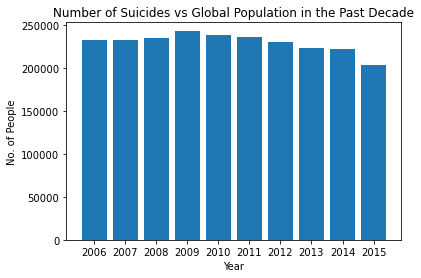

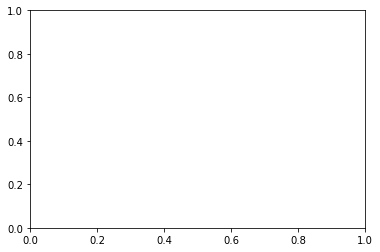

In [30]:
#Bar graph depicting the number of suicides per year from 2006-2015
ax, fig = plt.subplots(1,1)

#plt.subplots()
#plt.close("all")

####subplot 1


#plt.subplot(2,1,1)
#plt.bar(years, A, color = 'b', label='A')
#plt.bar(years, increment, color = 'r', bottom = A, label='increment')

plt.bar(x_years, list(y_sui_totals))

plt.title("Number of Suicides vs Global Population in the Past Decade")
# #plt.legend()
plt.xlabel("Year")
plt.ylabel("No. of People")
plt.xticks(range(2006,2016,1))
#plt.yticks(np.arange(0, max(y_sui_totals),5))
plt.ylim(0,max(y_sui_totals) + 10000)

ax, fig = plt.subplots(1,1,sharex=True,sharey=True)

plt.show()

global_avg = global_suicide_10['suicides_no'].mean()
global_avg

In [ ]:
#suicide_10.groupby("country").sum()

In [ ]:
by_year=suicide_10.groupby('year')
by_year

In [ ]:
by_country=by_year.groupby('country')
by_country.head()

In [ ]:
by_country.groupby("year").sum()

In [ ]:
df.loc[df['team'] == 'A', 'points'].sum()